In [47]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

In [48]:
data = mnist.load_data()
type(data)

tuple

In [49]:
(X_train, y_train), (X_test, y_test) = data
X_train[0].shape
X_train.shape

(60000, 28, 28)

In [51]:
X_train = X_train.reshape((X_train.shape[0], 28*28)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28*28)).astype('float32')

In [52]:
# Normalize the dataset
x_train = X_train / 255.0
x_test = X_test / 255.0

In [53]:
# One-hot encode the labels
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Keras -> Models -> Sequential


Keras -> Layers -> Dense

In [54]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(32, input_dim = 28 * 28, activation= 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [55]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [56]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32)                25120     
                                                                 
 dense_10 (Dense)            (None, 64)                2112      
                                                                 
 dense_11 (Dense)            (None, 10)                650       
                                                                 
Total params: 27,882
Trainable params: 27,882
Non-trainable params: 0
_________________________________________________________________


Train set => X_train; y_train

Epochs => An epoch means training the neural network with all the training data for one cycle. An epoch is made up of one or more batches, where we use a part of the dataset to train the neural network. Meaning we send the model to train 10 times to get high accuracy. You could also change the number of epochs depending on how the model performs.

Batch_size => Batch size is a term used in machine learning and refers to the number of training examples utilized in one iteration. So basically, we send 100 images to train as a batch per iteration.

In [57]:
model.fit(X_train, y_train, epochs=10, batch_size=100)

Epoch 1/10
600/600 [==============================] - 1s 1ms/step - loss: 2.0312 - accuracy: 0.6295
Epoch 2/10
600/600 [==============================] - 1s 850us/step - loss: 0.5382 - accuracy: 0.8555
Epoch 3/10
600/600 [==============================] - 1s 919us/step - loss: 0.4179 - accuracy: 0.8899
Epoch 4/10
600/600 [==============================] - 0s 752us/step - loss: 0.3584 - accuracy: 0.9048
Epoch 5/10
600/600 [==============================] - 0s 819us/step - loss: 0.3304 - accuracy: 0.9116
Epoch 6/10
600/600 [==============================] - 1s 907us/step - loss: 0.3023 - accuracy: 0.9192
Epoch 7/10
600/600 [==============================] - 0s 777us/step - loss: 0.2914 - accuracy: 0.9222
Epoch 8/10
600/600 [==============================] - 0s 729us/step - loss: 0.2695 - accuracy: 0.9266
Epoch 9/10
600/600 [==============================] - 0s 773us/step - loss: 0.2631 - accuracy: 0.9281
Epoch 10/10
600/600 [==============================] - 0s 815us/step - loss: 0.2456 

In [58]:
scores = model.evaluate(X_test, y_test)
print("Accuracy: ",scores[1] * 100)

313/313 [==============================] - 0s 442us/step - loss: 0.2911 - accuracy: 0.9293
Accuracy:  92.93000102043152


In [66]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest accuracy: {test_acc}")

313/313 - 0s - loss: 2.3398 - accuracy: 0.0974 - 124ms/epoch - 397us/step

Test accuracy: 0.09740000218153


In [67]:
# Predict labels for the test dataset
predictions = model.predict(x_test)

313/313 [==============================] - 0s 310us/step


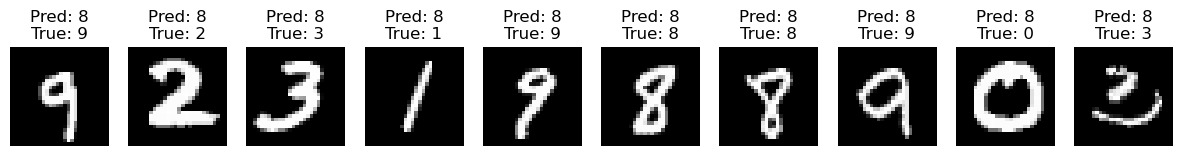

In [68]:
# Function to plot images with their predicted and actual labels
def plot_random_test_images(X_test, y_test, predictions, num_samples=10):
    plt.figure(figsize=(15, 3))
    for i in range(num_samples):
        index = np.random.randint(0, len(X_test))
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(X_test[index].reshape(28, 28), cmap='gray', interpolation='none')
        plt.title(f"Pred: {np.argmax(predictions[index])}\nTrue: {np.argmax(y_test[index])}")
        plt.axis('off')
    plt.show()

# Plot random test images with predictions
plot_random_test_images(X_test, y_test, predictions)